In [1]:
!awk '{print $2, $3}' neg_pos-total.final | sed 's/ /,/g' | sed 's/\n//g' > alldata.csv

In [141]:
!head alldata.csv

1.1e-30,0
1.2e-30,0
1.3e-30,0
6.7e-30,0
6.7e-30,0
8.9e-30,0
1.2e-29,0
1.4e-29,0
1.5e-29,0
1.9e-29,0


In [2]:
!awk -F ',' '{if ($2 == 0) print $0}' alldata.csv | wc -l

344


In [79]:
import seaborn as sn
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.metrics import confusion_matrix, matthews_corrcoef, accuracy_score
import math 

sn.set()

def mcc_acc_index(Y_true, evalues_list):
    ACC_list = []
    MCC_list = []
    th = []
    z = 0
    for j in range(-10,1,1):
        Y_predict = []
        threshold = 10**j
        for k in evalues_list:
            if k < threshold:
                c = 0
            else:
                c = 1
            Y_predict.append(c)
        y_predict = np.array(Y_predict)
        
        confusion_matrix(Y_true, y_predict)
        th.append(threshold)
        MCC_list.append([matthews_corrcoef(Y_true, y_predict),z])
        ACC_list.append([accuracy_score(Y_true, y_predict),z])
        z += 1 
    print(MCC_list)   
    max_mcc, index = max(MCC_list) 
    print(index)
    print(th)
    acc = ACC_list[index][0]
    return max_mcc, th[index], acc

def get_cfmx(threshold, evalue_list, y_true):
    max_mcc_y = []

    for k in evalue_list:
        if k < threshold:
            c = 0
        else:
            c = 1
        max_mcc_y.append(c)
    return max_mcc_y, confusion_matrix(y_true, max_mcc_y)

def plot_cm(Y_true, Y_pred):
    data = {'y_Actual':    Y_true,
            'y_Predicted': Y_pred
            }
    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    cmx = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    log_norm = LogNorm(vmin=df.min().min(), vmax=df.max().max())
    sn.heatmap(cmx, annot=True, linewidths = 1, square = True, cmap = 'PuBu_r', robust = True, norm=LogNorm(), fmt = '.1f', annot_kws={'size':16})
    plt.show()

In [4]:
!awk -F ',' '{if ($2 == 0) print $0}' alldata.csv | wc -l

344


In [45]:
import pandas as pd
from pandas import read_csv

f = 'alldata.csv'
names = ['e-value', 'attribute']
data = read_csv(f, names=names)

data.shape

(562116, 2)

In [46]:
def get_eval(x):
    evalues = []
    for i in x:
        evalues.append(i)
    return evalues

In [47]:
Y_actual = data['attribute']
x_eval = data['e-value']

print(Y_actual.shape)
print(x_eval.shape)

(562116,)
(562116,)


In [ ]:
from tabulate import tabulate
max_mcc, th, acc = mcc_acc_index(Y_actual, get_eval(x_eval))
max_pred_y, cm = get_cfmx(th, get_eval(x_eval), Y_actual)
print(tabulate([['Threshold: ','MCC: ', 'ACC: ', 'ConfusionMx:'], [th, max_mcc, acc]], headers='firstrow', tablefmt='fancy_grid'))
#print('Best performance on:','\nThreshold: ',th,'\nMCC: ', max_mcc,'\nACC: ', acc,'\nConfusionMx:')
plot_cm(Y_actual, max_pred_y)

In [ ]:
from sklearn.model_selection import StratifiedKFold

X = data['e-value']
y = data['attribute']

skf = StratifiedKFold(n_splits=2, shuffle=True,random_state=2)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

c=0
for i in y_test:
    if i == 0:
        c += 1 
print(c)

max_mcc, th, acc = mcc_acc_index(y_train, get_eval(X_train))
print(tabulate([['Trained Threshold ','MCC ', 'ACC '], [th, max_mcc, acc]], headers='firstrow', tablefmt='fancy_grid'),'\nConfusionMx' )
max_pred_ytrain, cm = get_cfmx(th, get_eval(X_train), y_train)
plot_cm(y_train, max_pred_ytrain)
print('BEST PERFORMANCE ON TESTING')
max_pred_ytest, cm = get_cfmx(th, get_eval(X_test), y_test)
print(tabulate([['Threshold ','MCC ', 'ACC '], [th, matthews_corrcoef(y_test, max_pred_ytest), accuracy_score(y_test, max_pred_ytest)]], headers='firstrow', tablefmt='fancy_grid'),'\nConfusionMx' )
#print('Best performance on testing:','\nThreshold: ',th,'\nMCC: ', matthews_corrcoef(y_test, max_pred_ytest),'\nACC: ', accuracy_score(y_test, max_pred_ytest),'\nConfusionMx:')
plot_cm(y_test, max_pred_ytest)



[[0.9838764533958095, 0], [0.9838764533958095, 1], [0.9883009687811888, 2], [0.9927058118065456, 3], [0.9927058118065456, 4], [0.9927058118065456, 5], [0.9956315737131413, 6], [0.99418248634843, 7], [0.994203519999512, 8], [0.9928064159444902, 9], [0.9843754925542852, 10], [0.9694606245614235, 11], [0.8211641070018736, 12], [0.3958599911758399, 13], [0.12346974754563322, 14], [0.0390420179558747, 15]]
6
[1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]
╒═══════════════╤══════════╤══════════╕
│   Threshold:  │    MCC:  │    ACC:  │
╞═══════════════╪══════════╪══════════╡
│         1e-09 │ 0.995632 │ 0.999995 │
╘═══════════════╧══════════╧══════════╛


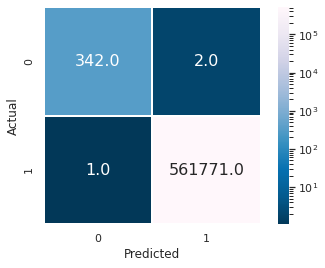

TRAIN: [     1      4      6 ... 562110 562113 562115] TEST: [     0      2      3 ... 562111 562112 562114]
TRAIN: [     0      2      3 ... 562111 562112 562114] TEST: [     1      4      6 ... 562110 562113 562115]
172
[[0.9883138936909739, 0], [0.99418248634843, 1], [0.991303177006321, 2], [0.9884487199565263, 3], [0.9885640142505367, 4], [0.9802397197502416, 5], [0.9694606245614235, 6], [0.8147925943967645, 7], [0.3999170701544296, 8], [0.12370408016205729, 9], [0.03907533530736914, 10]]
1
[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1]
╒══════════════════════╤══════════╤══════════╕
│   Trained Threshold  │     MCC  │     ACC  │
╞══════════════════════╪══════════╪══════════╡
│                1e-09 │ 0.994182 │ 0.999993 │
╘══════════════════════╧══════════╧══════════╛ 
ConfusionMx


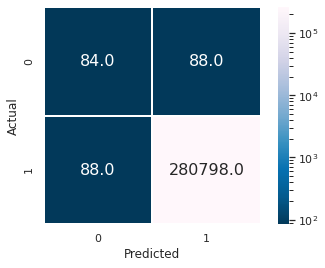

BEST PERFORMANCE ON TESTING
╒══════════════╤══════════╤══════════╕
│   Threshold  │     MCC  │     ACC  │
╞══════════════╪══════════╪══════════╡
│        1e-09 │ 0.997087 │ 0.999996 │
╘══════════════╧══════════╧══════════╛ 
ConfusionMx


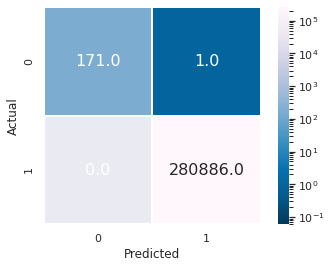

In [80]:
from sklearn.model_selection import StratifiedKFold

X = data['e-value']
y = data['attribute']

skf = StratifiedKFold(n_splits=2, shuffle=True,random_state=2)
skf.get_n_splits(X, y)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

c=0
for i in y_test:
    if i == 0:
        c += 1 
print(c)

max_mcc, th, acc = mcc_acc_index(y_train, get_eval(X_train))
print(tabulate([['Trained Threshold ','MCC ', 'ACC '], [th, max_mcc, acc]], headers='firstrow', tablefmt='fancy_grid'),'\nConfusionMx' )
max_pred_ytrain, cm = get_cfmx(th, get_eval(X_train), y_train)
plot_cm(y_test, max_pred_ytrain)
print('BEST PERFORMANCE ON TESTING')
max_pred_ytest, cm = get_cfmx(th, get_eval(X_test), y_test)
print(tabulate([['Threshold ','MCC ', 'ACC '], [th, matthews_corrcoef(y_test, max_pred_ytest), accuracy_score(y_test, max_pred_ytest)]], headers='firstrow', tablefmt='fancy_grid'),'\nConfusionMx' )
#print('Best performance on testing:','\nThreshold: ',th,'\nMCC: ', matthews_corrcoef(y_test, max_pred_ytest),'\nACC: ', accuracy_score(y_test, max_pred_ytest),'\nConfusionMx:')
plot_cm(y_test, max_pred_ytest)